El archivo christmas_movies.csv es un conjunto de datos detallado que contiene información sobre películas relacionadas con la temática navideña. Incluye diversas columnas que proporcionan una amplia gama de información como el título de la película, su calificación, duración, calificación en IMDb, puntuación meta, género, año de lanzamiento, descripción detallada, director, actores principales, número de votos recibidos, ingresos brutos, fuente de la imagen y el tipo de producción (película o programa de televisión). Este conjunto de datos abarca una variedad de géneros y años de lanzamiento, reflejando una rica diversidad en el ámbito de las películas navideñas. Además, incluye datos tanto numéricos como categóricos, pero presenta ciertos valores faltantes en columnas clave como la puntuación meta y los ingresos brutos, lo que puede representar desafíos para análisis específicos relacionados con la recepción crítica y el éxito comercial de estas películas.

In [5]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
# Asegúrate de tener el archivo 'christmas_movies.csv' en tu directorio
df = pd.read_csv('christmas_movies.csv')

# Visualizar las primeras filas del conjunto de datos
print(df.head())

# Información general del conjunto de datos
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Conteo de valores faltantes
print(df.isnull().sum())

# Conteo de valores únicos en cada columna
print(df.nunique())

# Análisis de tendencias: Calificaciones de IMDb a lo largo del tiempo
# Conversión de tipos de datos para el análisis
df['release_year'] = df['release_year'].dropna().astype(int)
df['votes'] = df['votes'].str.replace(',', '').astype(float)



                                   title rating  runtime  imdb_rating  \
0                          Love Actually      R    135.0          7.6   
1                             Home Alone     PG    103.0          7.7   
2  National Lampoon's Christmas Vacation  PG-13     97.0          7.5   
3                                    Elf     PG     97.0          7.1   
4         How the Grinch Stole Christmas     PG    104.0          6.3   

   meta_score                      genre  release_year  \
0        55.0     Comedy, Drama, Romance        2003.0   
1        63.0             Comedy, Family        1990.0   
2        49.0                     Comedy        1989.0   
3        66.0  Adventure, Comedy, Family        2003.0   
4        46.0    Comedy, Family, Fantasy        2000.0   

                                         description             director  \
0  Follows the lives of eight very different coup...       Richard Curtis   
1  An eight-year-old troublemaker, mistakenly lef...      

El Análisis Exploratorio de Datos (EDA) del conjunto de datos christmas_movies.csv revela lo siguiente:

Visión General de los Datos

Primeras Cinco Filas: Proporciona una visión general del conjunto de datos, mostrando columnas como título, calificación, duración, calificación de IMDb, puntuación meta, género, año de lanzamiento, descripción, director, estrellas, votos, ingresos brutos, fuente de la imagen y tipo (película/programa de TV).

Tipos de Datos: El conjunto de datos contiene una mezcla de datos numéricos (por ejemplo, duración, calificación de IMDb) y categóricos (por ejemplo, título, género).

Estadísticas Resumidas: Incluye conteos, valores únicos, ocurrencias principales y frecuencias para datos categóricos. El resumen de datos numéricos incluye la media, desviación estándar, mínimo, máximo y cuartiles.

Valores Faltantes: Algunas columnas tienen datos faltantes, notablemente meta_score y gross con 773 y 794 valores faltantes respectivamente. La calificación también tiene 213 valores faltantes.

Valores Únicos: Muestra la diversidad en cada columna, como 848 títulos únicos y 126 géneros únicos.

Observaciones

Duración y Calificaciones: La mayoría de las películas tienen datos sobre duración y calificaciones de IMDb, útiles para entender la longitud y la recepción general de estas películas.

Diversidad de Géneros: Con 126 géneros únicos, el conjunto de datos muestra una amplia gama de temas de películas navideñas.

Datos Faltantes: Una cantidad significativa de datos está faltante en meta_score y gross, lo que podría limitar el análisis relacionado con la recepción crítica y el éxito comercial.

Extensión Histórica: El conjunto de datos abarca varios años de lanzamiento, indicando un rango histórico de películas navideñas.

/Users/FGonzalez/anaconda3/envs/python311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/FGonzalez/anaconda3/envs/python311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


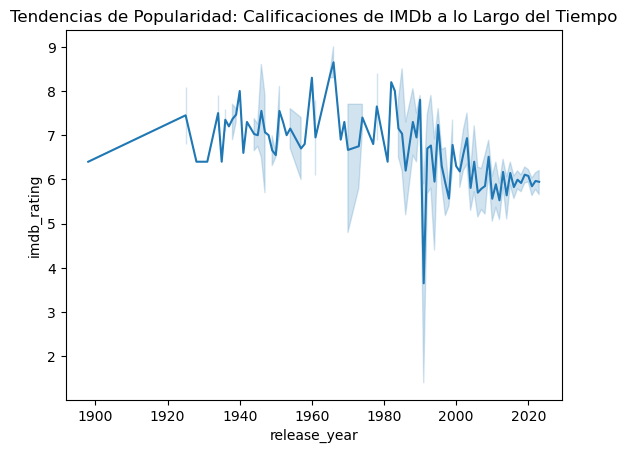

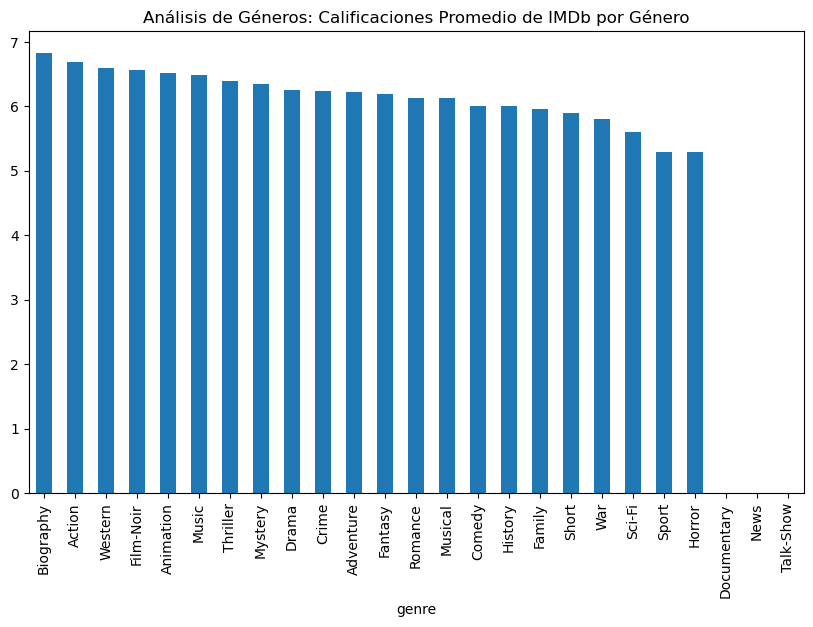

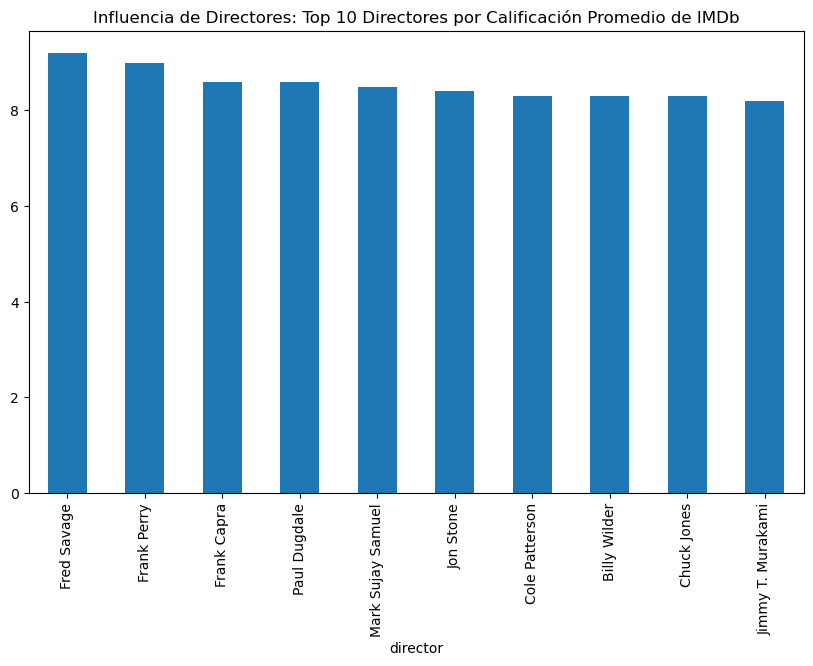

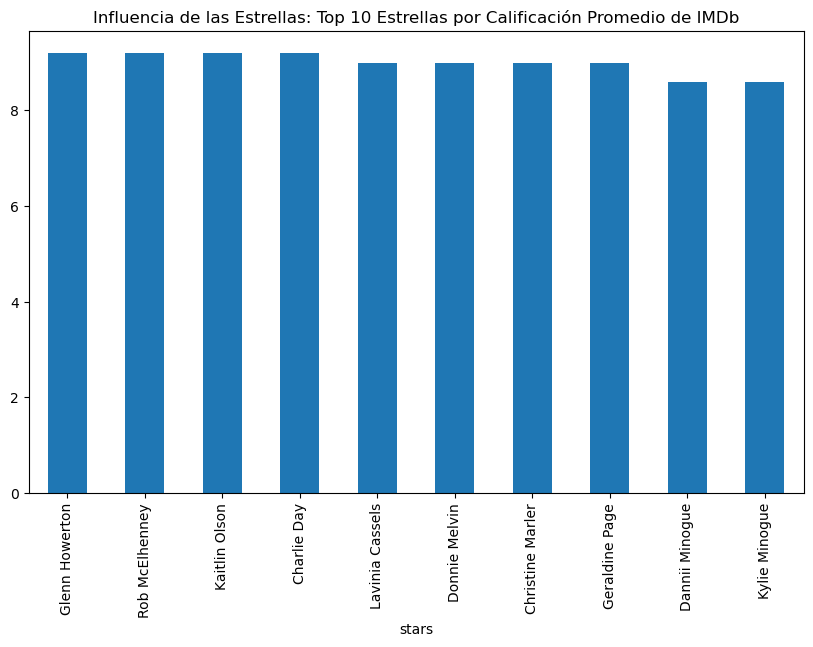

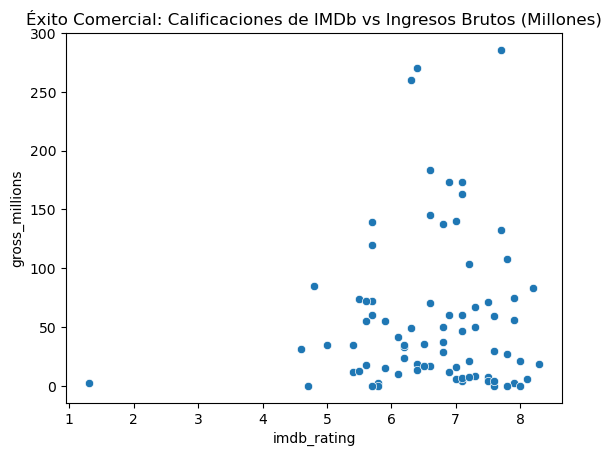

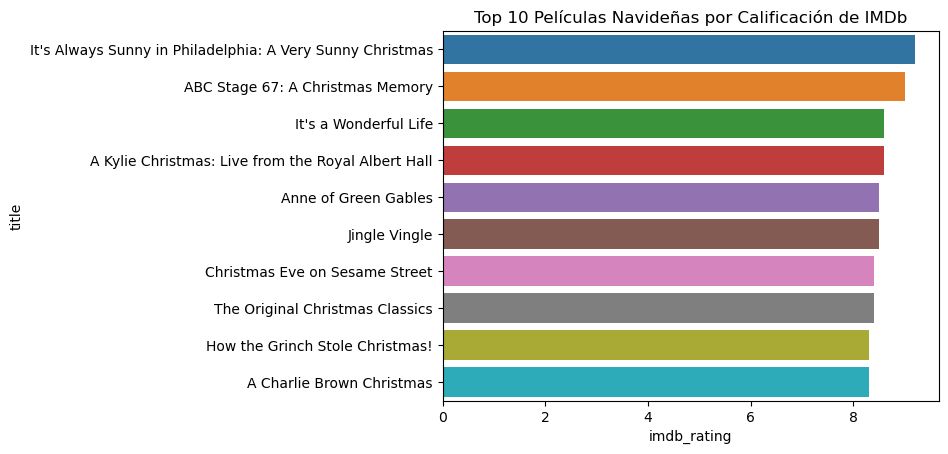

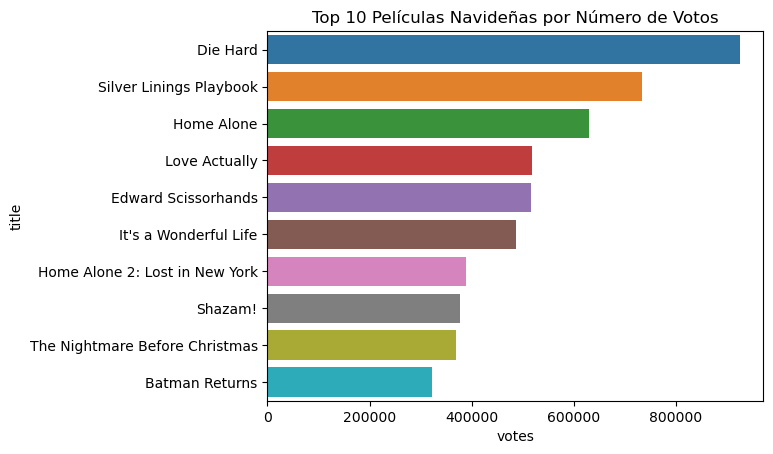

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el conjunto de datos
# Asegúrate de tener el archivo 'christmas_movies.csv' en el directorio correcto
df = pd.read_csv('christmas_movies.csv')

# Limpiar y preparar los datos
df['release_year'] = df['release_year'].dropna().astype(int)
df['votes'] = df['votes'].str.replace(',', '').astype(float)
df['gross_millions'] = df['gross'].replace('[\$,M]', '', regex=True).astype(float)

# Tendencias de Popularidad: Calificaciones de IMDb a lo Largo del Tiempo
sns.lineplot(data=df, x='release_year', y='imdb_rating')
plt.title('Tendencias de Popularidad: Calificaciones de IMDb a lo Largo del Tiempo')
plt.show()

# Análisis de Géneros: Calificaciones Promedio de IMDb por Género
genres_expanded = df.dropna(subset=['genre']).assign(genre=df['genre'].str.split(', ')).explode('genre')
genre_ratings = genres_expanded.groupby('genre')['imdb_rating'].mean().sort_values(ascending=False)
genre_ratings.plot(kind='bar', figsize=(10, 6))
plt.title('Análisis de Géneros: Calificaciones Promedio de IMDb por Género')
plt.show()

# Influencia de Directores y Estrellas
# Directores
top_directors = df.groupby('director')['imdb_rating'].mean().sort_values(ascending=False).head(10)
top_directors.plot(kind='bar', figsize=(10, 6))
plt.title('Influencia de Directores: Top 10 Directores por Calificación Promedio de IMDb')
plt.show()

# Estrellas
stars_expanded = df.assign(stars=df['stars'].str.split(', ')).explode('stars')
top_stars = stars_expanded.groupby('stars')['imdb_rating'].mean().sort_values(ascending=False).head(10)
top_stars.plot(kind='bar', figsize=(10, 6))
plt.title('Influencia de las Estrellas: Top 10 Estrellas por Calificación Promedio de IMDb')
plt.show()

# Éxito Comercial: Calificaciones de IMDb vs Ingresos Brutos
sns.scatterplot(data=df, x='imdb_rating', y='gross_millions')
plt.title('Éxito Comercial: Calificaciones de IMDb vs Ingresos Brutos (Millones)')
plt.show()

# Top 10 Películas Navideñas por Calificación de IMDb
top_movies = df.nlargest(10, 'imdb_rating')
sns.barplot(data=top_movies, x='imdb_rating', y='title')
plt.title('Top 10 Películas Navideñas por Calificación de IMDb')
plt.show()

# Top 10 Películas Navideñas por Número de Votos
top_voted_movies = df.nlargest(10, 'votes')
sns.barplot(data=top_voted_movies, x='votes', y='title')
plt.title('Top 10 Películas Navideñas por Número de Votos')
plt.show()
